In [1]:
import pickle
import os
import sys
import pandas as pd
import numpy as np
import re

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model ,load_model


from lifelines import CoxPHFitter
from Models.RCFR_AC_RefLong import SetModel
from Module.DataProcessing import DataLoad
from Module.MetricsGroup import DoMetric, DoAggMetric, DoSimEval



os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="3"



### Data load

In [4]:
StackedData, IntToGene, TTE, EVENT, TrIndEmbeddMask, ReferencePatIDLong, ReferencePatIDShort, NormDismInd, MergedData= DataLoad()

PatIDX = StackedData[:, 0:1].astype('int')
GeneIDX = StackedData[:, 1:2].astype('int')
GeneExp = StackedData[:, 2:3]

IndN = len(np.unique(PatIDX))
FeatN = len(np.unique(GeneIDX))


## Setting for tasks
#### WeightID: W0 = for prognosis-positive gene set, W20 = for prognosis-negative gene set

In [5]:
# Parameters for post-hoc models
ModelID ='M04'
WeightID = 'W10'

EmbedSize = 50
NCL_Feat = 5
NCL_Ind = 2
AdjCosWeight_ = 1. # This parameter affects only training phases, so thus any float number can be set in the post analysis phases. 
NumGene_CL = 100

ModelList = os.listdir('./Results/')
ModelList = [i for i in ModelList if ModelID in i and WeightID  in i  and 'hdf5' in i and 'NOC' not in i ]
FilePath = './Results/'

# Model structure load
RCFR_AC, LayerList = SetModel(AdjCosWeight_, NormDismInd, TrIndEmbeddMask, IndN, FeatN, ReferencePatIDLong, ReferencePatIDShort)

# Data for calculating metric
DataMetric = [MergedData, TTE, EVENT, NCL_Ind, NCL_Feat, NumGene_CL, IntToGene]

ColList = ['Model','AvgtPRate', 'AvgtAdjPRate', 'MintAdjPRate', 'AvgABSGeCohD', 'MinABSGeCohD', 'AvgABSSurvCoef', 'MinABSSurvCoef', 'AvgSurvpVal', 
           'MaxSurvpVal', 'NegExpAvgSurvpVal', 'NegExpMinSurvpVal', 'AvgNegSigRate',  'MinNegSigRate', 'AvgPosSigRate', 'MinPosSigRate','IndCentRatio']


## Procedure for Selecting best model

In [5]:
MetricTable = pd.DataFrame(columns=ColList)
InfoFeatGroupList = []

for num, model in enumerate(ModelList[:]):
    print(num)
    

    RCFR_AC.load_weights(FilePath + model)  # Model weights load
    InpInd, InpFeat, IndEmbeddWeig, IndEmbeddReferenceLong, FeatEmbeddWeig, IndCentroid, FeatCentroid, ICosCLSim, FCosCLSim = LayerList
        
    # Metric calculation: InfoFeatGroup will be used in UMAP analysis
    metrics, InfoFeatGroup = DoMetric (DataMetric, [InpInd, InpFeat, IndEmbeddWeig, FeatEmbeddWeig, IndCentroid, FeatCentroid, ICosCLSim, FCosCLSim])
    InfoFeatGroupList.append(InfoFeatGroup)
    print(InfoFeatGroup)
    MetricTable = pd.concat([MetricTable, pd.DataFrame([[model] + metrics], columns=ColList)], axis=0)


MetricTable['GroupM'] = np.array([re.findall('.\d+', i)[1][1:] for i in  MetricTable['Model']])
MetricTable['EpNum'] = np.array([ re.findall('.\d+\.', i)[0][1:-1] for i in  MetricTable['Model']]).astype('int')
MetricTable = MetricTable.sort_values(['GroupM','EpNum'])

#MetricTable.to_csv('./MetricTables/RCFR_ACMetricTable_'+str(WeightID)+'_Filt'+str(NumGene_CL)+'.csv',index=False)

0
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), [0.612, 0.401, 0.615, 0.59]]
1
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0.   , 0.002, 0.   , 0.018]), array([0.   , 0.   , 0.   , 0.018]), [0.711, 0.125, 0.616, 0.679]]
2
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0.034, 0.75 , 0.024, 0.154]), array([0.   , 0.002, 0.006, 0.118]), [0.504, 0.006, 0.101, 0.006]]
3
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0.036, 0.73 , 0.   , 0.176]), array([0.   , 0.002, 0.   , 0.15 ]), [0.005, 0.0, 0.0, 0.0]]
4
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0.028, 0.754, 0.   , 0.194]), array([0.   , 0.002, 0.   , 0.186]), [0.001, 0.0, 0.0, 0.0]]
5
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0.028, 0.774, 0.004, 0.178]), array([0.  , 0.  , 0.  , 0.21]

c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1594: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.496. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(


0
100
200
0
100
200
0
100
200
[array([0.        , 0.73134328, 0.        , 0.039801  ]), array([0.00497512, 0.        , 0.        , 0.32338308]), [0.0, 0.995, 0.0, 0.0]]
111
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0.084, 0.82 , 0.   , 0.154]), array([0.002, 0.002, 0.   , 0.162]), [0.0, 0.0, 0.0, 0.0]]
112
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0.07 , 0.84 , 0.036, 0.158]), array([0.002, 0.002, 0.   , 0.166]), [0.0, 0.0, 0.0, 0.0]]
113
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0.09 , 0.794, 0.   , 0.142]), array([0.   , 0.   , 0.   , 0.136]), [0.0, 0.0, 0.0, 0.0]]
114
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0.11 , 0.874, 0.03 , 0.142]), array([0.  , 0.  , 0.  , 0.14]), [0.0, 0.0, 0.0, 0.0]]
115
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0.082, 0.882, 0.07 , 0.152]), array([0.   , 0.   , 0.002, 0

c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1601: ConvergenceWarning: Newton-Rhaphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0.02409639, 0.        , 0.        , 0.03815261]), array([0.        , 0.        , 0.14658635, 0.58032129]), [0.851, 0.0, 0.0, 0.0]]
142
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0.       , 0.       , 0.       , 0.0465587]), array([0.19433198, 0.00202429, 0.2854251 , 0.6417004 ]), [0.0, 0.0, 0.0, 0.0]]
143
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0.        , 0.00208768, 0.        , 0.03757829]), array([0.23173278, 0.27974948, 0.3736952 , 0.70772443]), [0.0, 0.0, 0.0, 0.0]]
144
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0.        , 0.        , 0.        , 0.03404255]), array([0.34255319, 0.02553191, 0.31489362, 0.69787234]), [0.0, 0.0, 0.0, 0.0]]
145
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0.        , 0.        , 0.01096491, 0.02412281]), array([0.40131579, 0.3

c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1594: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.499. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(


0
100
200
0
100
200
0
100
200
[array([0.00473934, 0.65876777, 0.        , 0.03791469]), array([0.        , 0.00473934, 0.        , 0.33649289]), [0.01, 0.995, 0.0, 0.0]]
198
0
100
200


c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1594: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.498. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(


0
100
200
0
100
200
0
100
200
[array([0.        , 0.71568627, 0.        , 0.04411765]), array([0.        , 0.00490196, 0.        , 0.31862745]), [0.012, 0.995, 0.0, 0.0]]
199
0
100
200
0
100
200
0
100
200
0
100
200
[array([0.        , 0.73267327, 0.        , 0.04455446]), array([0.0049505 , 0.0049505 , 0.        , 0.32673267]), [0.0, 0.0, 0.0, 0.0]]
200
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), [0.612, 0.401, 0.615, 0.59]]
201
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0.   , 0.002, 0.   , 0.018]), array([0.   , 0.   , 0.   , 0.018]), [0.711, 0.125, 0.616, 0.679]]
202
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0.034, 0.752, 0.024, 0.156]), array([0.   , 0.002, 0.006, 0.118]), [0.504, 0.006, 0.101, 0.006]]
203
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0.036, 0.73 , 0.   , 0.176]), array([0.   , 0.

c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1594: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.487. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(


0
100
200
300
0
100
200
300
0
100
200
300
0
100
200
300
[array([0.        , 0.01311475, 0.        , 0.04262295]), array([0.01311475, 0.00327869, 0.07213115, 0.5704918 ]), [0.994, 0.0, 0.0, 0.0]]
282
0
100
200
300
0
100
200
300
0
100
200
300
0
100
200
300
[array([0.        , 0.01967213, 0.01639344, 0.03934426]), array([0.01311475, 0.00327869, 0.20983607, 0.53770492]), [0.0, 0.0, 0.0, 0.0]]
283
0
100
200
300
0
100
200
300
0
100
200
300
0
100
200
300
[array([0.00327869, 0.03278689, 0.04590164, 0.04262295]), array([0.00655738, 0.00327869, 0.2852459 , 0.58360656]), [0.0, 0.0, 0.0, 0.0]]
284
0
100
200
300
0
100
200
300
0
100
200
300
0
100
200
300
[array([0.00327869, 0.06557377, 0.10819672, 0.0557377 ]), array([0.00327869, 0.00655738, 0.32131148, 0.61639344]), [0.0, 0.0, 0.0, 0.0]]
285
0
100
200
300
0
100
200
300
0
100
200
300
0
100
200
300
[array([0.00655738, 0.00327869, 0.14754098, 0.06557377]), array([0.00327869, 0.        , 0.33442623, 0.65245902]), [0.0, 0.0, 0.0, 0.0]]
286
0
100
200
300

c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1594: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.488. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(


0
100
200
300
0
100
200
300
0
100
200
300
0
100
200
300
[array([0.        , 0.01315789, 0.        , 0.03947368]), array([0.00986842, 0.00328947, 0.05263158, 0.56907895]), [0.993, 0.0, 0.0, 0.0]]
382
0
100
200
300
0
100
200
300
0
100
200
300
0
100
200
300
[array([0.00328947, 0.01644737, 0.01973684, 0.04276316]), array([0.01315789, 0.00328947, 0.22039474, 0.55263158]), [0.0, 0.0, 0.0, 0.0]]
383
0
100
200
300
0
100
200
300
0
100
200
300
0
100
200
300
[array([0.00328947, 0.03618421, 0.04605263, 0.04276316]), array([0.00657895, 0.        , 0.27631579, 0.57894737]), [0.0, 0.0, 0.0, 0.0]]
384
0
100
200
300
0
100
200
300
0
100
200
300
0
100
200
300
[array([0.00657895, 0.02960526, 0.11513158, 0.04934211]), array([0.00328947, 0.        , 0.32565789, 0.61513158]), [0.0, 0.0, 0.0, 0.0]]
385
0
100
200
300
0
100
200
300
0
100
200
300
0
100
200
300
[array([0.01311475, 0.        , 0.12786885, 0.0557377 ]), array([0.00983607, 0.        , 0.33114754, 0.61639344]), [0.0, 0.0, 0.0, 0.0]]
386
0
100
200
300

c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1666: RuntimeWarning: overflow encountered in exp
  scores = weights * exp(dot(X, beta))
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1720: RuntimeWarning: invalid value encountered in multiply
  a1 = risk_phi_x_x * denom
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1722: RuntimeWarning: invalid value encountered in multiply
  summand = numer * denom[:, None]
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1727: RuntimeWarning: divide by zero encountered in log
  log_lik = log_lik + dot(x_death_sum, beta) + weighted_average * log(denom).sum()
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1714: RuntimeWarning: invalid value encountered in multiply
  denom = 1.0 / (risk_phi - increasing_proportion * tie_phi)
c:\users\user\anaconda3\envs\ai\lib\site-package

0
100
200
0
100
200
[array([0.00333333, 0.02      , 0.        , 0.03333333]), array([0.        , 0.        , 0.        , 0.03333333]), [0.034, 0.0, 1.0, 0.0]]
394
0
100
200
0
100
200
0
100
200
0
100
200
[array([0.02, 0.23, 0.  , 0.06]), array([0.  , 0.  , 0.  , 0.12]), [0.022, 0.0, 0.0, 0.0]]
395
0
100
200
0
100
200
0
100
200
0
100
200
[array([0.00333333, 0.50333333, 0.        , 0.05666667]), array([0.        , 0.00333333, 0.        , 0.23      ]), [0.024, 0.0, 0.0, 0.0]]
396
0
100
200
0
100
200
0
100
200
0
100
200
[array([0.00666667, 0.58666667, 0.        , 0.04333333]), array([0.  , 0.  , 0.  , 0.24]), [0.004, 0.0, 0.0, 0.0]]
397
0
100
200
0
100
200
0
100
200
0
100
200
[array([0.01333333, 0.56      , 0.        , 0.04      ]), array([0.00333333, 0.00333333, 0.        , 0.21666667]), [0.0, 0.0, 0.0, 0.0]]
398
0
100
200
0
100
200
0
100
200
0
100
200
[array([0.01      , 0.61666667, 0.        , 0.03666667]), array([0.00333333, 0.00333333, 0.        , 0.23666667]), [0.0, 0.0, 0.0, 0.0]]
39

c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1594: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.496. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(


0
100
200
0
100
200
0
100
200
[array([0.04526749, 0.6872428 , 0.        , 0.04526749]), array([0.00411523, 0.00411523, 0.        , 0.30041152]), [0.0, 0.995, 0.0, 0.0]]
411
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0.086, 0.818, 0.   , 0.154]), array([0.002, 0.002, 0.   , 0.158]), [0.0, 0.0, 0.0, 0.0]]
412
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0.046, 0.842, 0.034, 0.156]), array([0.   , 0.002, 0.   , 0.168]), [0.0, 0.0, 0.0, 0.0]]
413
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0.084, 0.79 , 0.   , 0.144]), array([0.   , 0.   , 0.   , 0.136]), [0.0, 0.0, 0.0, 0.0]]
414
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0.112, 0.872, 0.03 , 0.132]), array([0.   , 0.   , 0.   , 0.136]), [0.0, 0.0, 0.0, 0.0]]
415
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
0
100
200
300
400
[array([0.088, 0.89 , 0.068, 0.156]), array([0.   , 0.   , 0.00

c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1666: RuntimeWarning: overflow encountered in exp
  scores = weights * exp(dot(X, beta))
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1718: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 / np.array([risk_phi])
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1720: RuntimeWarning: invalid value encountered in multiply
  a1 = risk_phi_x_x * denom
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1722: RuntimeWarning: invalid value encountered in multiply
  summand = numer * denom[:, None]
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1714: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 / (risk_phi - increasing_proportion * tie_phi)
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.p

0
100
200
0
100
200
[array([0.01532567, 0.07279693, 0.        , 0.05747126]), array([0.        , 0.        , 0.        , 0.02681992]), [0.0, 0.0, 1.0, 0.0]]
494
0
100
200
0
100
200
0
100
200
0
100
200
[array([0.13409962, 0.42911877, 0.        , 0.07279693]), array([0.00383142, 0.        , 0.        , 0.08429119]), [0.0, 0.0, 0.0, 0.0]]
495
0
100
200
0
100
200
0
100
200
0
100
200
[array([0.01915709, 0.16091954, 0.        , 0.04980843]), array([0.        , 0.        , 0.        , 0.12643678]), [0.043, 0.0, 0.0, 0.0]]
496
0
100
200
0
100
200
0
100
200
0
100
200
[array([0.10505837, 0.53696498, 0.        , 0.05836576]), array([0.        , 0.        , 0.        , 0.23735409]), [0.022, 0.0, 0.0, 0.0]]
497
0
100
200
0
100
200
0
100
200
0
100
200
[array([0.06349206, 0.6468254 , 0.        , 0.04365079]), array([0.        , 0.        , 0.        , 0.28968254]), [0.009, 0.0, 0.0, 0.0]]
498
0
100
200
0
100
200
0
100
200
0
100
200
[array([0.00819672, 0.72131148, 0.        , 0.03278689]), array([0.  

c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1594: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.497. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(


100
200
0
100
200
0
100
200
[array([0.00411523, 0.68312757, 0.        , 0.03292181]), array([0.00411523, 0.00411523, 0.        , 0.28395062]), [0.0, 0.995, 0.0, 0.0]]


## Priority-based filter out by metrics

In [6]:
def Aggregation(MetricTable,AggMetricList):
    AggMetricTable = DoSimEval(MetricTable, 'MaxSurvpVal',pCutoff, AggMetricList, ExcRate, NmodEahG)
    AggMetricRank = DoAggMetric(AggMetricList, AggMetricTable[['Model']+AggMetricList]).sort_values('Metrics')
    AggMetricRank = pd.merge(AggMetricRank, AggMetricTable[['Model','MaxSurvpVal']], on='Model', how='left')
    BestModel = AggMetricRank.sort_values('Metrics').iloc[-1]
    
    return AggMetricRank, BestModel

In [7]:
pCutoff = 0.005
ExcRate = 0.2
NmodEahG = 1

NegMetricList = ['IndCentRatio', 'MinABSSurvCoef', 'AvgABSSurvCoef',  'MinNegSigRate', 'AvgNegSigRate', 'MinABSGeCohD', 'AvgABSGeCohD']
PosMetricList = ['IndCentRatio', 'MinABSSurvCoef', 'AvgABSSurvCoef', 'MinPosSigRate', 'AvgPosSigRate', 'MinABSGeCohD', 'AvgABSGeCohD']

MetricTable = pd.read_csv('./MetricTables/RCFR_ACMetricTable_'+str(WeightID)+'_Filt'+str(NumGene_CL)+'.csv')
MetricTable['GroupM'] = np.array([re.findall('.\d+', i)[2][1:] for i in  MetricTable['Model']])
MetricTable['EpNum'] = np.array([ re.findall('.\d+\.', i)[0][1:-1] for i in  MetricTable['Model']]).astype('int')




In [6]:
NegAggMetricRank, NegBestModel =  Aggregation(MetricTable, NegMetricList)
PosAggMetricRank, PosBestModel =  Aggregation(MetricTable, PosMetricList)

NegAggMetricRank.to_csv('./MetricTables/RCFR_AC_Neg_AggMetricRank_'+str(WeightID)+'_Filt'+str(NumGene_CL)+'.csv',index=False)
PosAggMetricRank.to_csv('./MetricTables/RCFR_AC_Pos_AggMetricRank_'+str(WeightID)+'_Filt'+str(NumGene_CL)+'.csv',index=False)

1
N obs with filter of IndCentRatio : 55
N obs with filter of MinABSSurvCoef : 44
N obs with filter of AvgABSSurvCoef : 36
N obs with filter of MinNegSigRate : 29
N obs with filter of AvgNegSigRate : 24
N obs with filter of MinABSGeCohD : 20
N obs with filter of AvgABSGeCohD : 16

2
N obs with filter of IndCentRatio : 53
N obs with filter of MinABSSurvCoef : 43
N obs with filter of AvgABSSurvCoef : 35
N obs with filter of MinNegSigRate : 28
N obs with filter of AvgNegSigRate : 23
N obs with filter of MinABSGeCohD : 19
N obs with filter of AvgABSGeCohD : 16

3
N obs with filter of IndCentRatio : 56
N obs with filter of MinABSSurvCoef : 45
N obs with filter of AvgABSSurvCoef : 36
N obs with filter of MinNegSigRate : 29
N obs with filter of AvgNegSigRate : 24
N obs with filter of MinABSGeCohD : 20
N obs with filter of AvgABSGeCohD : 16

4
N obs with filter of IndCentRatio : 56
N obs with filter of MinABSSurvCoef : 45
N obs with filter of AvgABSSurvCoef : 36
N obs with filter of MinNegSigR

In [450]:
NegAggMetricRank

,Model,IndCentRatio,MinABSSurvCoef,AvgABSSurvCoef,MinNegSigRate,AvgNegSigRate,MinABSGeCohD,AvgABSGeCohD,NormIndCentRatio,NormMinABSSurvCoef,NormAvgABSSurvCoef,NormMinNegSigRate,NormAvgNegSigRate,NormMinABSGeCohD,NormAvgABSGeCohD,Metrics,MaxSurvpVal
0,M04_RCFR_AC_W10_S5_Epo64.hdf5,0.406742,2.683515,3.180491,0.113960,0.381054,0.109298,0.233294,0.594607,0.633491,0.868516,0.000000,0.000000,0.231828,0.000000,2.328442,0.0
1,M04_RCFR_AC_W10_S3_Epo63.hdf5,0.419501,2.488740,3.099534,0.116071,0.404018,0.107945,0.266629,1.000000,0.001058,0.000000,0.074151,0.668014,0.000000,1.000000,2.743223,0.0
2,M04_RCFR_AC_W10_S4_Epo63.hdf5,0.416290,2.488415,3.112668,0.118541,0.404255,0.108574,0.265357,0.897964,0.000000,0.140905,0.160886,0.674921,0.107694,0.961861,2.944231,0.0
3,M04_RCFR_AC_W10_S1_Epo63.hdf5,0.419501,2.677142,3.146631,0.122093,0.404070,0.111102,0.260770,1.000000,0.612800,0.505264,0.285635,0.669524,0.540887,0.824246,4.438355,0.0
4,M04_RCFR_AC_W10_S2_Epo64.hdf5,0.388027,2.796391,3.192747,0.142433,0.415430,0.113781,0.237679,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.131521,5.131521,0.0


In [451]:
PosAggMetricRank

,Model,IndCentRatio,MinABSSurvCoef,AvgABSSurvCoef,MinPosSigRate,AvgPosSigRate,MinABSGeCohD,AvgABSGeCohD,NormIndCentRatio,NormMinABSSurvCoef,NormAvgABSSurvCoef,NormMinPosSigRate,NormAvgPosSigRate,NormMinABSGeCohD,NormAvgABSGeCohD,Metrics,MaxSurvpVal
0,M04_RCFR_AC_W10_S2_Epo43.hdf5,0.414966,2.040952,3.491518,0.231733,0.398225,0.111694,0.176246,0.794558,0.716850,1.000000,0.000000,0.006636,0.000000,0.000000,2.518044,0.0
1,M04_RCFR_AC_W10_S5_Epo43.hdf5,0.424658,2.024079,3.376742,0.241164,0.397609,0.114676,0.178023,1.000000,0.637876,0.738767,0.110449,0.000000,0.076785,0.066305,2.630182,0.0
2,M04_RCFR_AC_W10_S3_Epo44.hdf5,0.377483,1.887795,3.052156,0.262156,0.464588,0.150528,0.201265,0.000000,0.000000,0.000000,0.356283,0.721153,1.000000,0.933772,3.011207,0.0
3,M04_RCFR_AC_W10_S4_Epo44.hdf5,0.391304,1.979978,3.235243,0.294949,0.466667,0.145273,0.199311,0.292977,0.431461,0.416711,0.740312,0.743536,0.864692,0.860839,4.350528,0.0
4,M04_RCFR_AC_W10_S1_Epo44.hdf5,0.388982,2.101448,3.268365,0.317125,0.490486,0.150014,0.203040,0.243740,1.000000,0.492097,1.000000,1.000000,0.986760,1.000000,5.722596,0.0


### Debugging check for sign

In [37]:
from sklearn.metrics import silhouette_score
from lifelines import CoxPHFitter
import statsmodels.api as sm
from itertools import chain
import seaborn as sns

#---------------------------------------------------------------------------------------------------------------------------###
def cohen_d(d1, d2):
    n1, n2 = len(d1), len(d2)
    v1, v2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    p_s = np.sqrt(((n1 - 1) * v1 + (n2 - 1) * v2) / (n1 + n2 - 2))
    m1, m2 = np.mean(d1), np.mean(d2)
    return (m1 - m2) / p_s


In [110]:
Debug= []
def DoMetric (DataMetric, LayerList, idx):
    InpInd, InpFeat, IndEmbeddWeig, FeatEmbeddWeig, IndCentroid, FeatCentroid, ICosCLSim, FCosCLSim = LayerList 
    Data, TTE, EVENT, NCL_Ind, NCL_Feat, NumGene_CL,IntToGene= DataMetric
    
   
    # Access to similarity values between patient vectors and cluster centroids and gene vectors and cluster centroids
    PredICosCLSim = Model(InpInd,ICosCLSim)(np.array([[1]])).numpy()
    PredFCosCLSim = Model(InpFeat,FCosCLSim)(np.array([[1]]))[1:].numpy()

    # Assigning patient vectors to corresponding clusters
    IndCentMembers = np.argmax(PredICosCLSim, axis=-1)
    IndCentCounts = np.array([np.sum(IndCentMembers==CLID) for CLID in range(NCL_Ind)])


    # Assigning gene vectors to corresponding clusters
    FeatGroupLables = np.argmax(PredFCosCLSim, axis=-1)
    UniqFeatGLabel = np.unique(FeatGroupLables, return_counts=True)[0]
    FeatCentCounts = np.unique(FeatGroupLables, return_counts=True)[1]


    for i in range(NCL_Feat):
        if i not in UniqFeatGLabel:
            FeatCentCounts = np.insert(FeatCentCounts, i, 0).copy() 

    # Selecting gene names for the post-hoc analysis
    SelectedGeneID = []
    for TCL in range(NCL_Feat):
        FeatGroupLoc = np.where(FeatGroupLables==TCL)[0]
        FeatGroupLocInd = np.argsort(PredFCosCLSim[FeatGroupLables==TCL, TCL])[-NumGene_CL:]
        SelectedGeneID.append(FeatGroupLoc[FeatGroupLocInd] + 1)

    # Convert integer to gene name
    SelectedGeneName = []
    for i in SelectedGeneID:
        SelectedGeneName.append([IntToGene[j] for j in i])
    SelectedGeneNameList = np.unique(list(chain.from_iterable(SelectedGeneName)))

    # Clinical data processing for post-hoc analysis   
    ClinicData = Data[['patient_id','tumor_type','time','event']]
    SelGeneData = Data[SelectedGeneNameList]
    SelectedDATA = pd.concat([ClinicData, SelGeneData], axis=1)
    SelectedDATA['event'] = SelectedDATA['event'].astype('int32')
    PostHocSet =  SelectedDATA.iloc[:, 1:].copy()
    PostHocSet['IndCentMembers'] = IndCentMembers # The patient embedding matrix has already been sorted.
    UniqTumorType = np.sort(PostHocSet['tumor_type'].unique())
    IndSizeCancer = []
    for idx in UniqTumorType:
        UniqInd = np.unique(IndCentMembers[PostHocSet['tumor_type'] == idx], return_counts=True)
        UniqIndMask = np.array([ i in UniqInd[0] for i in np.arange(NCL_Ind) ])
        IndSizeCancer.append(UniqIndMask[None] * UniqInd[1])
    IndSizeCancer = np.concatenate(IndSizeCancer, axis=0)   
    IndCentRatio = min(np.min(IndSizeCancer, axis=1) / np.max(IndSizeCancer, axis=1))

    # Performing t-test between groups and obtaining p-values, adjust p-values, and cohen's d values
    # Performing survival anaylsis obtaining p-values and coefficient values
    SelectedGeneNameList = np.sort(SelectedGeneNameList)

    pRes = []
    AdjpRes = []
    tRes =[]
    CoDRes = []
    ABSSurvCoefRes = []
    SurvpValRes = []


    for typeTumor in UniqTumorType:
        TypeSet = PostHocSet[PostHocSet['tumor_type'] == typeTumor].copy()
        CoxHMSet = TypeSet[['time','event','IndCentMembers']]

        SubpRes = []
        SubtRes = []
        SubCoDRes = []

        
        # Performing survival analysis and obtaining p-value
        try:
            cph = CoxPHFitter()
            cph.fit(CoxHMSet, duration_col='time', event_col='event')
            #ABSSurvCoefRes.append( np.abs(cph.summary['coef'][0]))  
            ABSSurvCoefRes.append( cph.summary['coef'][0])  
            SurvpValRes.append( np.round(cph.summary['p'][0], 3)) 
            
            
            IndTMP = TypeSet['IndCentMembers'].values
            print(str(typeTumor))
            print(cph.summary['p'][0])
            
            if cph.summary.coef[0] < 0: 
                
                print('BeforeChange:', TypeSet['IndCentMembers'].iloc[0])
                TypeSet.loc[TypeSet['tumor_type'] == typeTumor, 'IndCentMembers'] -= 1
                TypeSet.loc[TypeSet['tumor_type'] == typeTumor, 'IndCentMembers'] = TypeSet.loc[TypeSet['tumor_type'] == typeTumor, 'IndCentMembers']**2
                print('AfterChange:', TypeSet['IndCentMembers'].iloc[0])
                tmp1 = TypeSet['IndCentMembers'].iloc[0]
            
        except:
            ABSSurvCoefRes.append( 1e-7)  
            SurvpValRes.append(1.)

            
        try:
            CoxHMSet = TypeSet[['time','event','IndCentMembers']]
            print('ForGenes:', CoxHMSet['IndCentMembers'].iloc[0])
            cph = CoxPHFitter()
            cph.fit(CoxHMSet, duration_col='time', event_col='event')
            print(np.sum(TypeSet['IndCentMembers'] - IndTMP))
            print(cph.summary['p'][0])
            
            if tmp1 != CoxHMSet['tumor_type'].iloc[0]:
                Debug.append(idx)
            
            '''
            if np.sum(TypeSet['IndCentMembers'] - IndTMP)>0:
                Debug.append(idx)
            '''
            
            
        except:
            print('')
            
        
            
        for num, gene in enumerate (SelectedGeneNameList) :
            
            Group0 = TypeSet[TypeSet['IndCentMembers'] == 0][gene]
            Group1 = TypeSet[TypeSet['IndCentMembers'] == 1][gene]
            SubpRes.append(sm.stats.ttest_ind(Group0, Group1,usevar='unequal' )[1]) # p-value
            SubCoDRes.append(cohen_d(Group0,Group1)) # cohen's d

        pRes.append(SubpRes)
        AdjpRes.append(sm.stats.multipletests(SubpRes,alpha=0.1, method='fdr_bh')[1])
        tRes.append(SubtRes)
        CoDRes.append(SubCoDRes)


    PRate = [ np.sum(np.array(subLis) < 0.05, axis=-1) / len(subLis) for subLis in pRes]
    AdjPRate = [ np.sum(np.array(subLis) < 0.05, axis=-1) / len(subLis) for subLis in AdjpRes]
    MeanABSCohD = [ np.mean(subLis) for subLis in CoDRes]
    #MeanABSCohD = [ np.mean(np.abs(subLis)) for subLis in CoDRes]
    MeanCohD = [ np.mean(subLis) for subLis in CoDRes]
    
    
    AdjpRes = np.array(AdjpRes)
    CoDRes = np.array(CoDRes)
    
    SigMask = AdjpRes < 0.05
    FiltCoDRes= CoDRes * SigMask
    NegMask = FiltCoDRes < 0
    PosMask = FiltCoDRes > 0
    NegSigRate = np.sum(NegMask, axis=-1)/NegMask.shape[-1]
    PosSigRate = np.sum(PosMask, axis=-1)/PosMask.shape[-1]
    
    
    # Metrics for selecting the best model
    AvgtPRate = np.mean(PRate)
    AvgtAdjPRate = np.mean(AdjPRate) 
    MintAdjPRate = np.min(AdjPRate) 
    
    AvgABSGeCohD = np.mean(MeanABSCohD)
    MinABSGeCohD = np.min(MeanABSCohD)

    AvgABSSurvCoef = np.mean(ABSSurvCoefRes)    
    MinABSSurvCoef = np.min(ABSSurvCoefRes)    
    
    AvgSurvpVal = np.mean(SurvpValRes)    
    MaxSurvpVal = np.max(SurvpValRes)    
    
    AvgNegSigRate = np.mean(NegSigRate)
    MinNegSigRate = np.min(NegSigRate )
    
    AvgPosSigRate = np.mean(PosSigRate)
    MinPosSigRate = np.min(PosSigRate )
    
    print('AvgPosSigRate',AvgPosSigRate)
    print('AvgNegSigRate',AvgNegSigRate)
    print(MeanABSCohD)
    


    return [AvgtPRate, AvgtAdjPRate, MintAdjPRate, AvgABSGeCohD, MinABSGeCohD, AvgABSSurvCoef, MinABSSurvCoef, AvgSurvpVal, MaxSurvpVal,
            np.exp(-AvgSurvpVal),np.exp(-MaxSurvpVal), AvgNegSigRate,  MinNegSigRate, AvgPosSigRate, MinPosSigRate, IndCentRatio], [NegSigRate, PosSigRate,SurvpValRes], Debug
    # [AdjPRate, ABSSurvCoefRes] for visualization of umap


In [112]:
NumGene_CL = 20

# Data for calculating metric
DataMetric = [MergedData, TTE, EVENT, NCL_Ind, NCL_Feat, NumGene_CL, IntToGene]

In [115]:
MetricTable = pd.DataFrame(columns=ColList)
InfoFeatGroupList = []

for num, model in enumerate(ModelList[:]):
    print('Index: ',num)
    

    RCFR_AC.load_weights(FilePath + model)  # Model weights load
    InpInd, InpFeat, IndEmbeddWeig, IndEmbeddReferenceLong, FeatEmbeddWeig, IndCentroid, FeatCentroid, ICosCLSim, FCosCLSim = LayerList
        
    # Metric calculation: InfoFeatGroup will be used in UMAP analysis
    metrics, InfoFeatGroup, Debug = DoMetric (DataMetric, [InpInd, InpFeat, IndEmbeddWeig, FeatEmbeddWeig, IndCentroid, FeatCentroid, ICosCLSim, FCosCLSim], num)
    print()

Index:  0
BRCA
0.6118391716624587
ForGenes: 1
0
0.6118391716624587

COLO
0.40053864991702004
BeforeChange: 0
AfterChange: 1
ForGenes: 1
0
0.40053864991702004

GLIOMA
0.6148185808837724
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
0.6148185808837724

KIPAN
0.5899923879499921
ForGenes: 1
0
0.5899923879499921

AvgPosSigRate 0.0
AvgNegSigRate 0.0
[-0.002290776604790458, -0.08907492792578064, 0.02555618850064241, -0.00344367897409072]

Index:  1
BRCA
0.7112842684064404
ForGenes: 1
0
0.7112842684064404

COLO
0.12543794357015164
BeforeChange: 0
AfterChange: 1
ForGenes: 1
0
0.12543794357015162

GLIOMA
0.6156813927573592
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
0.6156813927573592

KIPAN
0.6793237441681057
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
0.6793237441681057

AvgPosSigRate 0.0
AvgNegSigRate 0.01
[0.030113907393648085, -0.12899655589718242, -0.032815571534506704, 0.010773335108837165]

Index:  2
BRCA
0.5044585488444766
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
0.5044585488444766

c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1594: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.496. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1594: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.496. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(



BeforeChange: 0
AfterChange: 1
ForGenes: 1
0
0.9948925463109016

GLIOMA
2.912109561880391e-21
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
2.912109561880391e-21

KIPAN
8.702393195917572e-24
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
8.702393195930814e-24

AvgPosSigRate 0.0975609756097561
AvgNegSigRate 0.18902439024390247
[-0.036483616936189095, -0.2667199598717334, -0.06863070998486716, 0.11883892701491475]

Index:  111
BRCA
1.854766704472604e-05
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
1.854766704472604e-05

COLO
1.1645337132816135e-06
BeforeChange: 0
AfterChange: 1
ForGenes: 1
0
1.1645337132816135e-06

GLIOMA
1.6732681341256233e-29
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
1.6732681341256233e-29

KIPAN
1.8758410352474104e-31
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
1.875841035248141e-31

AvgPosSigRate 0.05
AvgNegSigRate 0.2675
[-0.0657811912107738, -0.31928798086893545, -0.06100747715382484, 0.02704017623692083]

Index:  112
BRCA
5.199172556295687e-07
BeforeChange: 1
Af

c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1601: ConvergenceWarning: Newton-Rhaphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1601: ConvergenceWarning: Newton-Rhaphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


0.8510194735716068
BeforeChange: 0
AfterChange: 1
ForGenes: 1
0
0.8510194735716068

COLO
6.9334593244003545e-12
ForGenes: 0
0
6.9334593244003545e-12

GLIOMA
3.613265331053228e-23
ForGenes: 0
0
3.613265331053228e-23

KIPAN
1.598615761135541e-28
ForGenes: 0
0
1.598615761135541e-28

AvgPosSigRate 0.20750000000000002
AvgNegSigRate 0.0375
[-0.081459792937443, 0.03492562121965518, 0.12475472497860908, 0.2386403023990903]

Index:  142
BRCA
1.5218443179118784e-07
ForGenes: 0
0
1.5218443179118784e-07

COLO
5.980646030895641e-10
ForGenes: 0
0
5.980646030895641e-10

GLIOMA
1.466266656441911e-24
ForGenes: 0
0
1.466266656441911e-24

KIPAN
1.774423518772631e-29
ForGenes: 0
0
1.774423518772631e-29

AvgPosSigRate 0.32999999999999996
AvgNegSigRate 0.015
[0.09534184378850241, 0.05995456166808535, 0.13518711686948634, 0.25933073449298955]

Index:  143
BRCA
1.9723267806962405e-09
ForGenes: 0
0
1.9723267806962405e-09

COLO
8.416238353542974e-08
ForGenes: 0
0
8.416238353542974e-08

GLIOMA
2.308182219982828e

c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1594: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.499. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1594: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.499. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(


COLO
0.9950454167677307
BeforeChange: 0
AfterChange: 1
ForGenes: 1
0
0.9950454167677307

GLIOMA
3.2416168740697014e-16
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
3.2416168740697014e-16

KIPAN
6.014951275995939e-31
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
6.014951275995939e-31

AvgPosSigRate 0.10294117647058823
AvgNegSigRate 0.1764705882352941
[-0.036217822290725066, -0.2767419178095412, -0.018699354070860548, 0.1130825162447557]

Index:  198
BRCA
0.011801244781641605
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
0.011801244781641693



c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1594: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.498. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1594: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.498. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(


COLO
0.9949715958239974
BeforeChange: 0
AfterChange: 1
ForGenes: 1
0
0.9949715958239974

GLIOMA
1.7008890279496596e-18
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
1.7008890279496596e-18

KIPAN
1.3856455197031664e-32
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
1.385645519704624e-32

AvgPosSigRate 0.07954545454545454
AvgNegSigRate 0.17045454545454544
[-0.04013140268333995, -0.28727826512521987, -0.022832256122601667, 0.10249452832209442]

Index:  199
BRCA
4.905029991006955e-05
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
4.905029991006955e-05

COLO
2.8510873995537435e-05
BeforeChange: 0
AfterChange: 1
ForGenes: 1
0
2.8510873995537435e-05

GLIOMA
9.956943509373034e-18
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
9.956943509375144e-18

KIPAN
1.677805032882988e-31
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
1.6778050328831087e-31

AvgPosSigRate 0.08333333333333333
AvgNegSigRate 0.2142857142857143
[-0.03741958125329408, -0.28536176546709546, -0.0612241125347601, 0.11212454781021945]

Inde

c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1594: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.487. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1594: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.487. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(


BRCA
0.9938517404542304
ForGenes: 0
0
0.9938517404542304

COLO
2.22510768232542e-08
ForGenes: 1
0
2.22510768232542e-08

GLIOMA
1.702374056310386e-21
ForGenes: 0
0
1.702374056310386e-21

KIPAN
3.270974744044256e-33
ForGenes: 0
0
3.270974744044256e-33

AvgPosSigRate 0.21180555555555552
AvgNegSigRate 0.013888888888888888
[0.06146990455711207, -0.038069782505933056, 0.10563639952676623, 0.21353007820147052]

Index:  282
BRCA
3.3766052406931406e-08
ForGenes: 0
0
3.3766052406931406e-08

COLO
4.413755470496462e-09
ForGenes: 1
0
4.413755470496462e-09

GLIOMA
1.9844310146225625e-25
ForGenes: 0
0
1.9844310146225625e-25

KIPAN
5.783444087407687e-33
ForGenes: 0
0
5.783444087407687e-33

AvgPosSigRate 0.2777777777777778
AvgNegSigRate 0.006944444444444444
[0.06716709381852981, -0.05568495439998227, 0.1292201196074815, 0.20527849675284554]

Index:  283
BRCA
4.0935913891786836e-07
ForGenes: 0
0
4.0935913891786836e-07

COLO
2.070890603022916e-08
ForGenes: 1
0
2.070890603022916e-08

GLIOMA
8.024825873627

c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1594: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.488. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1594: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.488. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(


BRCA
0.9934273995684453
ForGenes: 0
0
0.9934273995684453

COLO
2.22510768232542e-08
ForGenes: 1
0
2.22510768232542e-08

GLIOMA
2.233086028909529e-22
ForGenes: 0
0
2.233086028909529e-22

KIPAN
1.722928768346109e-32
ForGenes: 0
0
1.722928768346109e-32

AvgPosSigRate 0.2363013698630137
AvgNegSigRate 0.010273972602739725
[0.05779816692140005, -0.03493186098164169, 0.11134573785849042, 0.22637917833567783]

Index:  382
BRCA
4.556926674490363e-08
ForGenes: 0
0
4.556926674490363e-08

COLO
5.224616663828962e-09
ForGenes: 1
0
5.224616663828962e-09

GLIOMA
2.408809369778289e-25
ForGenes: 0
0
2.408809369778289e-25

KIPAN
5.306710185585007e-32
ForGenes: 0
0
5.306710185585007e-32

AvgPosSigRate 0.2808219178082192
AvgNegSigRate 0.003424657534246575
[0.06136368473165388, -0.03570536416981038, 0.13744010406338594, 0.21279444497468278]

Index:  383
BRCA
4.809140040936238e-07
ForGenes: 0
0
4.809140040936238e-07

COLO
1.5495247041873252e-07
ForGenes: 1
0
1.5495247041873252e-07

GLIOMA
8.095425226024677e-

c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1666: RuntimeWarning: overflow encountered in exp
  scores = weights * exp(dot(X, beta))
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1720: RuntimeWarning: invalid value encountered in multiply
  a1 = risk_phi_x_x * denom
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1722: RuntimeWarning: invalid value encountered in multiply
  summand = numer * denom[:, None]
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1727: RuntimeWarning: divide by zero encountered in log
  log_lik = log_lik + dot(x_death_sum, beta) + weighted_average * log(denom).sum()
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1714: RuntimeWarning: invalid value encountered in multiply
  denom = 1.0 / (risk_phi - increasing_proportion * tie_phi)
c:\users\user\anaconda3\envs\ai\lib\site-package

ForGenes: 1

KIPAN
5.785004969557641e-26
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
5.785004969558813e-26

AvgPosSigRate 0.016666666666666666
AvgNegSigRate 0.016666666666666666
[-0.03597538615962462, -0.04173927061241409, 0.0009638988178709593, 0.014417700024337893]

Index:  394
BRCA
0.022025062232916004
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
0.022025062232916004

COLO
1.3781691138624026e-07
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
1.3781691138624026e-07

GLIOMA
4.350028228365721e-20
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
4.350028228364675e-20

KIPAN
1.3960765662813626e-33
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
1.3960765662813626e-33

AvgPosSigRate 0.029166666666666667
AvgNegSigRate 0.0875
[-0.0665150227826529, -0.14201115647753948, -0.002409992541671349, 0.02381003117359036]

Index:  395
BRCA
0.02438729795617713
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
0.02438729795617713

COLO
7.025712385919539e-07
BeforeChange: 0
AfterChange: 1
ForGenes: 1
0
7.02571238591

c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1594: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.496. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1594: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.496. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(


COLO
0.994921096082427
BeforeChange: 0
AfterChange: 1
ForGenes: 1
0
0.9949210972088932

GLIOMA
4.8397744066856197e-26
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
4.83977440668205e-26

KIPAN
1.660158707326507e-26
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
1.6601587073302527e-26

AvgPosSigRate 0.06756756756756757
AvgNegSigRate 0.1858108108108108
[-0.03592714413077645, -0.2536115007093187, -0.02182415077335572, 0.08574296421132194]

Index:  411
BRCA
1.854766704472604e-05
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
1.854766704472604e-05

COLO
8.436031436175352e-07
BeforeChange: 0
AfterChange: 1
ForGenes: 1
0
8.436031436175352e-07

GLIOMA
7.453108405836072e-30
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
7.453108405840376e-30

KIPAN
1.8758410352474104e-31
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
1.875841035248141e-31

AvgPosSigRate 0.05
AvgNegSigRate 0.2675
[-0.0657811912107738, -0.31383294626658287, -0.058098716088996104, 0.02704017623692083]

Index:  412
BRCA
4.1529618677731467e-0

c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1666: RuntimeWarning: overflow encountered in exp
  scores = weights * exp(dot(X, beta))
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1718: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 / np.array([risk_phi])
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1720: RuntimeWarning: invalid value encountered in multiply
  a1 = risk_phi_x_x * denom
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1722: RuntimeWarning: invalid value encountered in multiply
  summand = numer * denom[:, None]
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1714: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 / (risk_phi - increasing_proportion * tie_phi)
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.p

ForGenes: 1

KIPAN
5.524016031667706e-20
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
5.524016031667706e-20

AvgPosSigRate 0.009375
AvgNegSigRate 0.0375
[-0.05630870862331812, -0.051078965458849435, 0.0024462882376310316, -0.01381651608696382]

Index:  494
BRCA
9.454022523375241e-05
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
9.454022523374302e-05

COLO
7.971661772060802e-09
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
7.9716617720587e-09

GLIOMA
3.1665595909077334e-20
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
3.1665595909077334e-20

KIPAN
1.4273416251714318e-30
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
1.4273416251714318e-30

AvgPosSigRate 0.024999999999999998
AvgNegSigRate 0.14375
[-0.08548176476977828, -0.16029226989394668, -0.028582472377678275, 0.0024303688117584903]

Index:  495
BRCA
0.04337674379926186
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
0.04337674379926136

COLO
2.2832903900841177e-08
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
2.2832903900841177e-08

GLIOMA
1.

c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1594: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.497. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(
c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\fitters\coxph_fitter.py:1594: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.497. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(


COLO
0.9949617092172537
BeforeChange: 0
AfterChange: 1
ForGenes: 1
0
0.9949160415383211

GLIOMA
1.4845601398015818e-17
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
1.4845601398025247e-17

KIPAN
1.6816797911083763e-27
BeforeChange: 1
AfterChange: 0
ForGenes: 0
0
1.681679791108595e-27

AvgPosSigRate 0.05067567567567568
AvgNegSigRate 0.19256756756756757
[-0.03335626128375901, -0.2620151036138229, -0.05133253288908043, 0.06999355842883521]



<tf.Tensor: shape=(), dtype=float32, numpy=0.58399236>

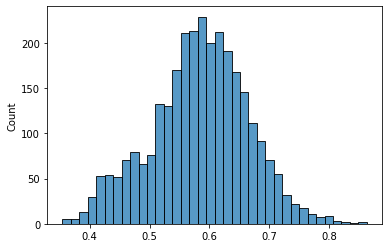

In [151]:
sns.histplot(np.ravel(tf.norm(PredIndEmbedd, axis=-1)))
tf.reduce_mean(tf.norm(PredIndEmbedd, axis=-1))

<tf.Tensor: shape=(), dtype=float32, numpy=0.6529714>

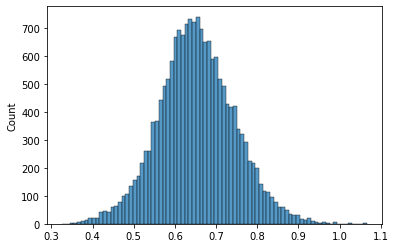

In [152]:
sns.histplot(np.ravel(tf.norm(PredFeatEmbedd, axis=-1)))
tf.reduce_mean(tf.norm(PredFeatEmbedd, axis=-1))

In [164]:
model = 'M04_RCFR_AC_W10_S1_Epo44.hdf5'  # 'M04_RCFR_AC_W10_S1_Epo44', 'M04_RCFR_AC_W10_S2_Epo64'

RCFR_AC, LayerList = SetModel(AdjCosWeight_, NormDismInd, TrIndEmbeddMask, IndN, FeatN, ReferencePatIDLong, ReferencePatIDShort)
RCFR_AC.load_weights(FilePath + model)  # Model weights load
InpInd, InpFeat, IndEmbeddWeig, IndEmbeddReferenceLong, FeatEmbeddWeig, IndCentroid, FeatCentroid, ICosCLSim, FCosCLSim = LayerList

In [165]:
PredIndEmbedd = Model(InpInd,IndEmbeddWeig)([1])[1:].numpy()
PredFeatEmbedd = Model(InpFeat,FeatEmbeddWeig)([1])[1:].numpy()

PredICosCLSim = Model(InpInd,ICosCLSim)([1]).numpy()
IndCentMembers = np.argmax(PredICosCLSim, axis=-1)

PredFCosCLSim = Model(InpFeat,FCosCLSim)([1])[1:].numpy()
MaxPredFCosCLSim = tf.reduce_max(PredFCosCLSim, axis=-1)

PredIndEmbeddNorm = tf.linalg.l2_normalize(PredIndEmbedd, axis=-1)
PredFeatEmbeddNorm = tf.linalg.l2_normalize(PredFeatEmbedd, axis=-1)

IndCosSim = tf.matmul(PredIndEmbeddNorm,PredIndEmbeddNorm, transpose_b=True)
IDLongestFromLong =  tf.argmin(IndCosSim[ReferencePatIDLong])
FeatCosSim = tf.matmul(PredFeatEmbeddNorm,PredFeatEmbeddNorm, transpose_b=True)
CrossCosSim = tf.matmul(PredIndEmbeddNorm,PredFeatEmbeddNorm, transpose_b=True)

PredIndCentroid = Model(InpInd,IndCentroid)([1]).numpy()
PredFeatCentroid = Model([InpInd,InpFeat],FeatCentroid)(([1],[1])).numpy()


IndEmbeddReferenceLong = PredIndEmbedd[ReferencePatIDLong]
IndEmbeddReferenceShort = PredIndEmbedd[ReferencePatIDShort]

IndEmbeddReferenceLongNorm = tf.linalg.l2_normalize(IndEmbeddReferenceLong, axis=-1)[None]
IndEmbeddReferenceShortNorm = tf.linalg.l2_normalize(IndEmbeddReferenceShort, axis=-1)[None]


IndCosSim1 = tf.matmul(PredIndEmbeddNorm,PredIndEmbeddNorm, transpose_b=True)
IndCentMembers1 = np.argmax(PredICosCLSim, axis=-1).copy()
CrossCosSim1 = tf.matmul(PredIndEmbeddNorm,PredFeatEmbeddNorm, transpose_b=True)
Z1 = CrossCosSim1 * MaxPredFCosCLSim[None] * 0.5 + 0.5 

'''
IndCosSim2 = tf.matmul(PredIndEmbeddNorm,PredIndEmbeddNorm, transpose_b=True)
IndCentMembers2 = np.argmax(PredICosCLSim, axis=-1).copy()
CrossCosSim2 = tf.matmul(PredIndEmbeddNorm,PredFeatEmbeddNorm, transpose_b=True)
Z2 = CrossCosSim2 * MaxPredFCosCLSim[None] * 0.5 + 0.5 
'''


#IndCentMembers1_change =  PredICosCLSim[ChangeIDs]
#IndCentMembers1_fixed =  PredICosCLSim[FixedIDs]

#IndCentMembers2_change =  PredICosCLSim[ChangeIDs]
#IndCentMembers2_fixed =  PredICosCLSim[FixedIDs]

'\nIndCosSim2 = tf.matmul(PredIndEmbeddNorm,PredIndEmbeddNorm, transpose_b=True)\nIndCentMembers2 = np.argmax(PredICosCLSim, axis=-1).copy()\nCrossCosSim2 = tf.matmul(PredIndEmbeddNorm,PredFeatEmbeddNorm, transpose_b=True)\nZ2 = CrossCosSim2 * MaxPredFCosCLSim[None] * 0.5 + 0.5 \n'

In [166]:
np.mean(Z1), np.min(Z1), np.max(Z1)

(0.40445963, 0.038796604, 0.79566175)

<AxesSubplot:ylabel='Count'>

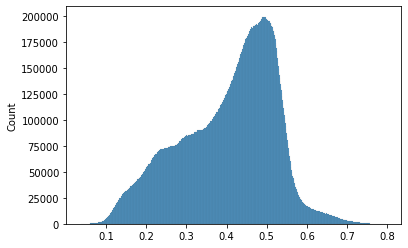

In [167]:
sns.histplot(np.ravel(Z1))

In [160]:
np.mean(Z2), np.min(Z2), np.max(Z2)

(0.4050008, 0.045445293, 0.81675184)

<AxesSubplot:ylabel='Count'>

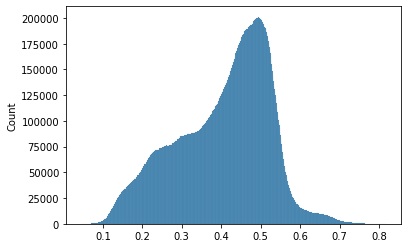

In [159]:
sns.histplot(np.ravel(Z2))

In [30]:
TumType = 'GLIOMA'


In [31]:
ChangeIDs = np.where(IndCentMembers1 == IndCentMembers2)[0]
FixedIDs = np.where(IndCentMembers1 != IndCentMembers2)[0]

PostHocSet1 = MergedData.copy()
PostHocSet2 = MergedData.copy()

PostHocSet1['IndCentMembers'] = IndCentMembers1
PostHocSet2['IndCentMembers'] = IndCentMembers2

CoxHMSet1 = PostHocSet1[['time','event','IndCentMembers']][PostHocSet1['tumor_type']==TumType]
CoxHMSet2 = PostHocSet2[['time','event','IndCentMembers']][PostHocSet2['tumor_type']==TumType]

<AxesSubplot:ylabel='Count'>

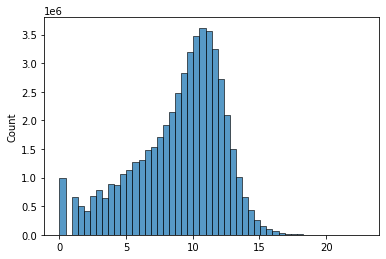

In [190]:
sns.histplot(np.ravel(PostHocSet1.iloc[:, 4:-1]), bins=50)

In [32]:
cph = CoxPHFitter()
cph.fit(CoxHMSet1, duration_col='time', event_col='event')
cph.summary

c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\utils\__init__.py:1188: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
covariate,,,,,,,,,,
IndCentMembers,2.610427,13.604854,0.234137,2.151527,3.069326,8.597981,21.527386,11.149162,7.228405e-29,93.482237


In [33]:
cph = CoxPHFitter()
cph.fit(CoxHMSet2, duration_col='time', event_col='event')
cph.summary

c:\users\user\anaconda3\envs\ai\lib\site-packages\lifelines\utils\__init__.py:1188: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
covariate,,,,,,,,,,
IndCentMembers,-2.796391,0.06103,0.299828,-3.384043,-2.208738,0.03391,0.109839,-9.326646,1.092744e-20,66.310606


(11.078014136533717, 7.8339947758806755e-28, 2331.3772083344393)

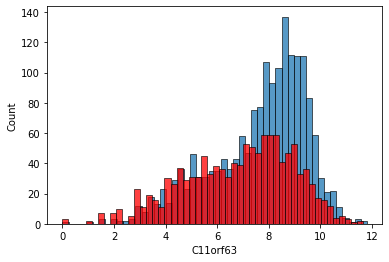

In [38]:
Group0_1 = PostHocSet1[PostHocSet1['IndCentMembers'] == 0]['C11orf63'] # LR
Group1_1 = PostHocSet1[PostHocSet1['IndCentMembers'] == 1]['C11orf63'] # HR

sns.histplot(Group0_1, bins=50)
sns.histplot(Group1_1, bins=50, color='red' )
sm.stats.ttest_ind(Group0_1.values, Group1_1.values,usevar='unequal' )


In [39]:
Group0_1.mean(), Group1_1.mean(), Group0_1.std(), Group1_1.std(), Group0_1.shape, Group1_1.shape

(7.650365657786348,
 6.821347119045459,
 1.8484943835516292,
 2.0807152077742774,
 (1758,),
 (1184,))

(0.6618971547525657, 0.5080905790471508, 2853.672570971762)

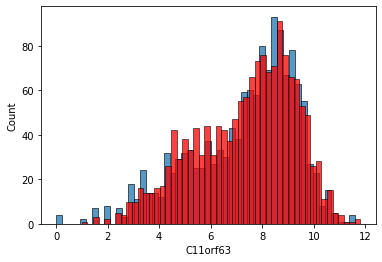

In [41]:
Group0_2 = PostHocSet2[PostHocSet2['IndCentMembers'] == 0]['C11orf63'] # HR
Group1_2 = PostHocSet2[PostHocSet2['IndCentMembers'] == 1]['C11orf63'] # LR

sns.histplot(Group1_2, bins=50, )
sns.histplot(Group0_2, bins=50, color='red')
sm.stats.ttest_ind(Group0_2.values, Group1_2.values,usevar='unequal' )


In [42]:
Group0_2.mean(), Group1_2.mean(), Group0_2.std(), Group1_2.std(), Group0_2.shape, Group1_2.shape

(7.339660264696298,
 7.29091555125823,
 1.9342588359964448,
 2.0451186710654845,
 (1558,),
 (1384,))

In [43]:
ChangeSet = PostHocSet1.iloc[ChangeIDs]
Cha_0_1 = ChangeSet[ChangeSet['IndCentMembers'] == 0]['ACTB']
Cha_1_1 = ChangeSet[ChangeSet['IndCentMembers'] == 1]['ACTB']

FixSet = PostHocSet1.iloc[FixedIDs]
Fix_0_1 = FixSet[FixSet['IndCentMembers'] == 0]['ACTB']
Fix_1_1 = FixSet[FixSet['IndCentMembers'] == 1]['ACTB']

ChangeSet = PostHocSet2.iloc[ChangeIDs]
Cha_0_2 = ChangeSet[ChangeSet['IndCentMembers'] == 0]['ACTB']
Cha_1_2 = ChangeSet[ChangeSet['IndCentMembers'] == 1]['ACTB']

FixSet = PostHocSet2.iloc[FixedIDs]
Fix_0_2 = FixSet[FixSet['IndCentMembers'] == 0]['ACTB']
Fix_1_2 = FixSet[FixSet['IndCentMembers'] == 1]['ACTB']




In [44]:
Cha_0_1.shape, Cha_1_1.shape, Fix_0_1.shape, Fix_1_1.shape

((494,), (120,), (1264,), (1064,))

In [45]:
Cha_0_2.shape, Cha_1_2.shape, Fix_0_2.shape, Fix_1_2.shape

((494,), (120,), (1064,), (1264,))

<AxesSubplot:xlabel='ACTB', ylabel='Count'>

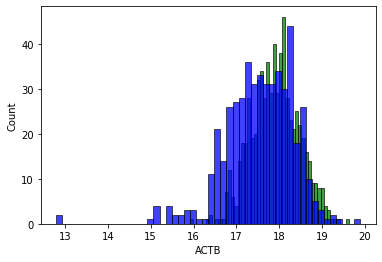

In [87]:
sns.histplot(Cha_0_1, bins=50, color='green')
sns.histplot(Cha_1_1, bins=50, color='blue')

<AxesSubplot:xlabel='ACTB', ylabel='Count'>

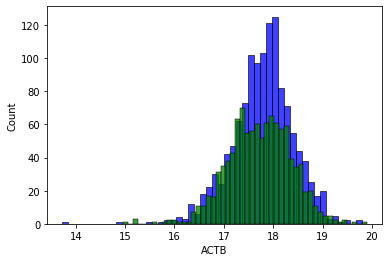

In [926]:
sns.histplot(Fix_0_1, bins=50, color='blue')
sns.histplot(Fix_1_1, bins=50, color='green')


<AxesSubplot:ylabel='Count'>

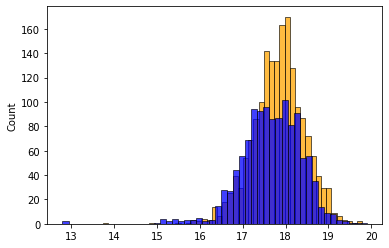

In [946]:
#sns.histplot(np.concatenate([Fix_0_1 , Cha_1_1]), bins=50, color='blue')
sns.histplot(np.concatenate([Fix_0_1 , Cha_0_1]), bins=50, color='orange')

sns.histplot(np.concatenate([Fix_1_1 , Cha_1_1]), bins=50, color='blue')
#sns.histplot(np.concatenate([Fix_1_1 , Cha_0_1]), bins=50, color='orange')

(17.787068947260156, 17.830709721269802)

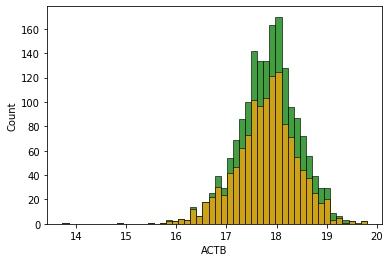

In [963]:
sns.histplot(np.concatenate([Cha_0_1 , Fix_0_1]),  bins=50, color='green')
sns.histplot(Fix_0_1 ,  bins=50, color='orange')
Fix_0_1.mean(), np.concatenate([Cha_0_1 , Fix_0_1]).mean()

(17.727797000074798, 17.65864132583538)

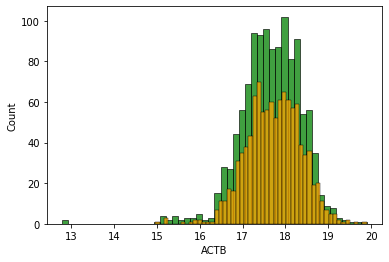

In [966]:
sns.histplot(np.concatenate([Cha_1_1 , Fix_1_1]),  bins=50, color='green')
sns.histplot(Fix_1_1 ,  bins=50, color='orange')
Fix_1_1.mean(), np.concatenate([Cha_1_1 , Fix_1_1]).mean()

<AxesSubplot:xlabel='ACTB', ylabel='Count'>

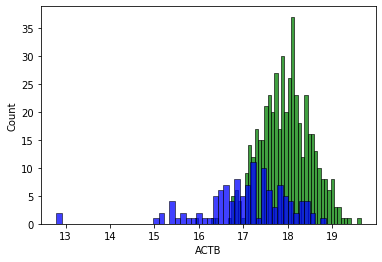

In [952]:
sns.histplot(Cha_0_2, bins=50, color='green')
sns.histplot(Cha_1_2, bins=50, color='blue')

<AxesSubplot:xlabel='ACTB', ylabel='Count'>

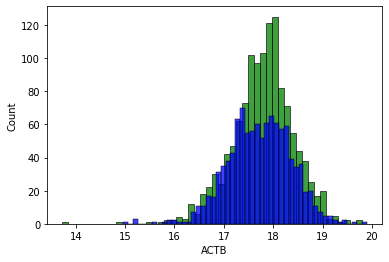

In [955]:
sns.histplot(Fix_1_2, bins=50, color='green')
sns.histplot(Fix_0_2, bins=50, color='blue')

<AxesSubplot:ylabel='Count'>

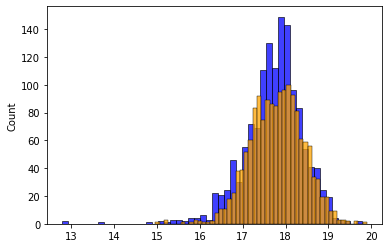

In [958]:
sns.histplot(np.concatenate([Fix_1_2 , Cha_1_2]), bins=50, color='blue')
#sns.histplot(np.concatenate([Fix_1_2 , Cha_0_2]), bins=50, color='orange')
#sns.histplot(np.concatenate([Fix_0_2 , Cha_1_2]), bins=50, color='blue')
sns.histplot(np.concatenate([Fix_0_2 , Cha_0_2]), bins=50, color='orange')



(17.727797000074798, 17.795833471588615)

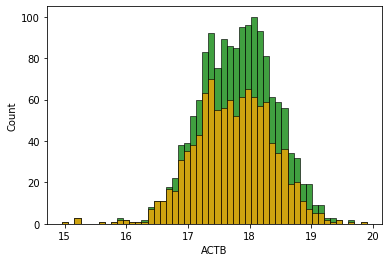

In [969]:
sns.histplot(np.concatenate([Cha_0_2 , Fix_0_2]),  bins=50, color='green')
sns.histplot(Fix_0_2 ,  bins=50, color='orange')
Fix_0_2.mean(), np.concatenate([Cha_0_2 , Fix_0_2]).mean()

(17.787068947260156, 17.72276768139187)

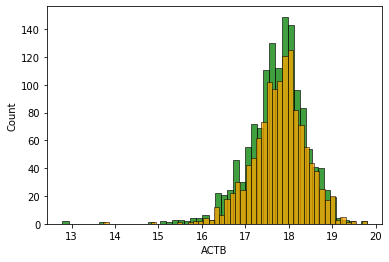

In [970]:
sns.histplot(np.concatenate([Cha_1_2 , Fix_1_2]),  bins=50, color='green')
sns.histplot(Fix_1_2 ,  bins=50, color='orange')
Fix_1_2.mean(), np.concatenate([Cha_1_2 , Fix_1_2]).mean()

(17.830709721269802, 17.72276768139187, (1758,), (1384,))

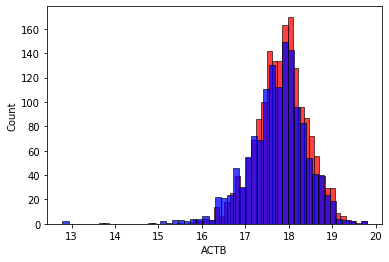

In [762]:
sns.histplot(Group0_1, bins=50, color='red')
sns.histplot(Group1_2, bins=50, color='blue')
Group0_1.mean(), Group1_2.mean(), Group0_1.shape, Group1_2.shape

(17.795833471588615, 17.658641325835383, (1558,), (1184,))

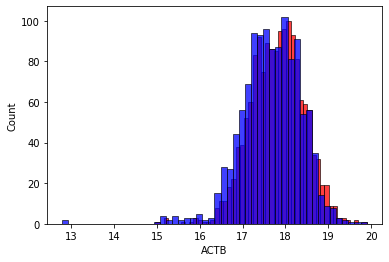

In [764]:
sns.histplot(Group0_2, bins=50, color='red')
sns.histplot(Group1_1, bins=50, color='blue')
Group0_2.mean(), Group1_1.mean(), Group0_2.shape, Group1_1.shape 